In [2]:
import sys
!{sys.executable} -m pip install graphviz

     |████████████████████████████████| 46 kB 1.5 MB/s eta 0:00:01


In [3]:
import graphviz

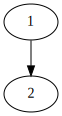

In [4]:
dot = graphviz.Digraph()
dot.node('1')
dot.node('2')
dot.edges(['12'])
dot